# Lane Detection Project using Hough Lines

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [12]:
img = cv2.imread('C:/Users/saketh/opencv/lane_image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting bgr image to rgb image

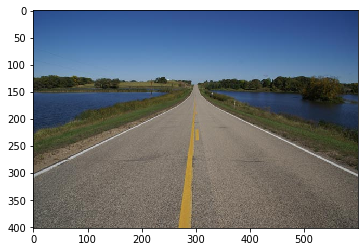

In [13]:
plt.imshow(img)

(402, 600)

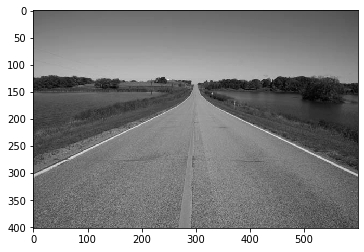

In [14]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')
img1.shape

# GAUSSIAN BLUR

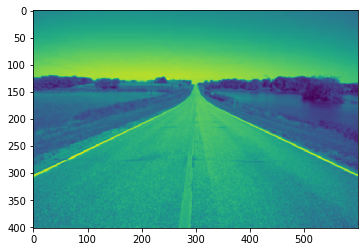

In [15]:
img_blur = cv2.GaussianBlur(img1, (5,5), 0) # Gaussian Blur reduces the noise and the kernel smoothens the image pixels corresponding to an average value
plt.imshow(img_blur)

# CANNY EDGE DETECTION

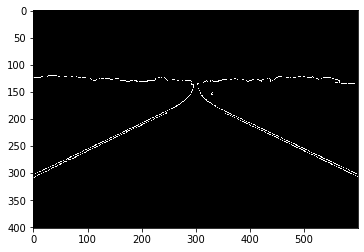

In [16]:
img_canny = cv2.Canny(img_blur, threshold1=10, threshold2=200) # Canny edge detection tells the change in pixel gradient from low to high intensity.
plt.imshow(img_canny, cmap='gray')

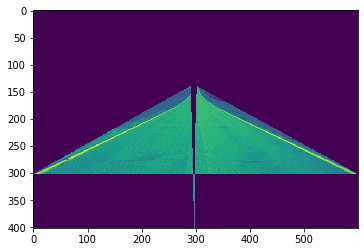

In [17]:
### Region of interest

points = np.array([[(0,302),(290,140),(302,140),(600,302)]], dtype= np.int32)
mask = np.zeros_like(img1)
cv2.fillPoly(mask, points, 255)
masked_image = cv2.bitwise_and(img1, mask)
plt.imshow(masked_image)

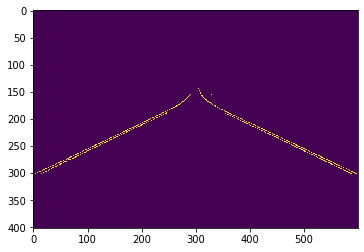

In [18]:
masked_image = cv2.bitwise_and(img_canny, mask)
plt.imshow(masked_image)

In [19]:
# using hough lines 

rho= 2
theta = np.pi/180
threshold = 40
min_line_len = 100
max_line_gap = 50
lines= cv2.HoughLinesP(masked_image, rho, theta, threshold,np.array([]), min_line_len, max_line_gap)

line_image = np.zeros((masked_image.shape[0],masked_image.shape[1],3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), [255,0,0], 10)

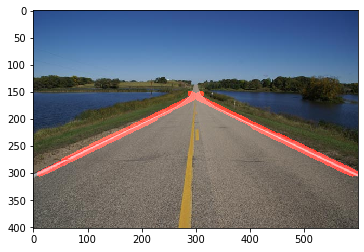

In [20]:
Image_with_lines = cv2.addWeighted(src1=img, alpha=1, src2=line_image, beta=1, gamma=0)
plt.imshow(Image_with_lines)